## Importing all required modules

In [215]:
!pip install catboost

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import scipy
from scipy import stats

import catboost
from catboost import CatBoostClassifier
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading the file and exploratory data analysis

In [216]:
df = pd.read_csv("dga_data.csv")

In [217]:
df.head()

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker


In [218]:
df.shape

(160000, 4)

In [219]:
df.dtypes

isDGA       object
domain      object
host        object
subclass    object
dtype: object

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   isDGA     160000 non-null  object
 1   domain    159998 non-null  object
 2   host      160000 non-null  object
 3   subclass  160000 non-null  object
dtypes: object(4)
memory usage: 4.9+ MB


In [221]:
df.describe()

,isDGA,domain,host,subclass
count,160000,159998,160000,160000
unique,2,159998,159235,9
top,dga,6xzxsw3sokvg1tc752y1a6p0af,ventures-africa.com,alexa
freq,80000,1,2,42616


In [222]:
df.isDGA.nunique()

2

In [223]:
df.isDGA.unique()

array(['dga', 'legit'], dtype=object)

In [224]:
df.domain.nunique()

159998

In [225]:
df.host.nunique()

159235

In [226]:
df.subclass.nunique()

9

In [227]:
df.subclass.unique()

array(['gameoverdga', 'cryptolocker', 'newgoz', 'nivdort', 'goz',
       'necurs', 'bamital', 'legit', 'alexa'], dtype=object)

In [228]:
df.dropna(inplace=True) # To remove null 

In [229]:
tld = df['host'].str.split('.',expand=True)

In [230]:
df['TLD'] = tld[1]

In [231]:
df.head()

,isDGA,domain,host,subclass,TLD
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga,com
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker,ru
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker,ru
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz,net
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker,ru


In [232]:
df.tail()

,isDGA,domain,host,subclass,TLD
159995,legit,manhunt,manhunt.net,alexa,net
159996,legit,yupptv,yupptv.com,alexa,com
159997,legit,bbcmundo,bbcmundo.com,legit,com
159998,legit,kanogames,kanogames.com,legit,com
159999,legit,roadrover,roadrover.cn,alexa,cn


## Types of features

### 1. Length of the domain name

In [233]:
L = []
def length():
    for i in df.domain:
        L.append(len(i)) 

In [234]:
df2 = pd.DataFrame()

In [235]:
length()

In [236]:
df2 ['length'] = L

### Performing Feature Standardization for 'length of the domain name' feature

In [237]:
df2['length'] = stats.zscore(df2['length'])

### 2. Domain name with only digits 

In [238]:
Digit = []
def Only_Digits(): 
    for number in df.domain:
        num = "".join(re.findall("[0-9]+",number))
        if num.isnumeric():
            Digit.append(1)
        else:
            Digit.append(0)

In [239]:
Only_Digits()

In [240]:
df2['Only_Digits'] = Digit

### 3. Vowel to consonant ratio

In [241]:
rat = []

def countCharacterType(str):
    vowels = 0
    consonant = 0
    specialChar = 0
    digit = 0
  
    for i in range(0, len(str)): 
          
        ch = str[i] 
  
        if ( (ch >= 'a' and ch <= 'z') or 
             (ch >= 'A' and ch <= 'Z') ): 
  
            ch = ch.lower()
  
            if (ch == 'a' or ch == 'e' or ch == 'i' 
                        or ch == 'o' or ch == 'u'):
                vowels += 1
            else:
                consonant += 1
          
        elif (ch >= '0' and ch <= '9'):
            digit += 1
        else:
            specialChar += 1
    
    try:
        ratio = (vowels / (vowels + consonant)) * 100
        
    except:
        if((vowels + consonant) <= 0) :
            ratio = 0
            
    
    # print("Vowels:", vowels)
    # print("Consonant:", consonant) 
    # print("Digit:", digit) 
    # print("Special Character:", specialChar)
    rat.append(ratio)

In [242]:
for char_counter in df.domain:
    str = char_counter
    countCharacterType(str)

In [243]:
df2['Vowel_to_Consonent_Ratio'] = rat

In [244]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio
0,1.891397,1,17.647059
1,0.080370,0,0.000000
2,0.080370,0,21.428571
3,1.740478,1,20.000000
4,-0.221468,0,25.000000


## Performing Standardization for Vowel to Consonant Ratio Feature

In [245]:
df2['Vowel_to_Consonent_Ratio'] = stats.zscore(df2['Vowel_to_Consonent_Ratio'])

In [246]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio
0,1.891397,1,-0.824942
1,0.080370,0,-2.059821
2,0.080370,0,-0.560325
3,1.740478,1,-0.660291
4,-0.221468,0,-0.310408


### 4.Only one character

In [247]:
One = []
def One_Char():
    for ch in df.domain:
        if ch.isalpha():
            if len(ch)==1:
                One.append(ord(ch))
            else:
                One.append(1)
        else:
            One.append(0)

In [248]:
One_Char()

In [249]:
df2['Only_One_Char'] = One

In [250]:
print(df2.tail())

          length  Only_Digits  Vowel_to_Consonent_Ratio  Only_One_Char
159993 -0.976062            0                 -0.060492              1
159994 -1.126981            0                 -0.893546              1
159995 -0.825143            0                 -0.310408              1
159996 -0.674224            0                  1.050246              1
159997 -0.674224            0                  1.050246              1


### 5. Number of digits in the domain name

In [251]:
Num_digit = []
def countDigit(str):
    
    isNum = 0
    for i in range(0, len(str)):
        
        ch = str[i]
        
        if (ch >= '0' and ch <= '9'):
            isNum += 1
        else:
            pass
    Num_digit.append(isNum)

In [252]:
for num_counter in df.domain:
    str = num_counter
    countDigit(str)

In [253]:
df2["Number_Of_Digit"] = Num_digit

In [254]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit
0,1.891397,1,-0.824942,0,9
1,0.080370,0,-2.059821,1,0
2,0.080370,0,-0.560325,1,0
3,1.740478,1,-0.660291,0,10
4,-0.221468,0,-0.310408,1,0


### Performing Standardization for 'number of digit' feature

In [255]:
df2['Number_Of_Digit'] = stats.zscore(df2['Number_Of_Digit'])

In [256]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit
0,1.891397,1,-0.824942,0,2.169307
1,0.080370,0,-2.059821,1,-0.362104
2,0.080370,0,-0.560325,1,-0.362104
3,1.740478,1,-0.660291,0,2.450575
4,-0.221468,0,-0.310408,1,-0.362104


### 6 . Maximum number of consicative vowels in a string

In [257]:
vowel_count = []

def max_vowels(st):
    word = "".join(re.findall("[a-zA-Z]+",st))
    word.lower()
    cmp = "aeiou"
    m_val = 0
    t_tal = 0
    for i in range(len(st)):
        if st[i] in cmp:
            t_tal += 1
        elif st[i] not in cmp:
            if m_val < t_tal:
                m_val = t_tal
                t_tal = 0
        if i == len(st) - 1 :
            if m_val < t_tal:
                m_val = t_tal
    vowel_count.append(m_val)

In [258]:
for vowel_counter in df.domain:
    str = vowel_counter
    max_vowels(str)

In [259]:
df2["Consecutive_Vowel_Count"] = vowel_count

In [260]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count
0,1.891397,1,-0.824942,0,2.169307,2
1,0.080370,0,-2.059821,1,-0.362104,0
2,0.080370,0,-0.560325,1,-0.362104,2
3,1.740478,1,-0.660291,0,2.450575,2
4,-0.221468,0,-0.310408,1,-0.362104,2


### Performing Standardization for 'Consecutive vowel count' feature

In [261]:
df2['Consecutive_Vowel_Count'] = stats.zscore(df2['Consecutive_Vowel_Count'])

In [262]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count
0,1.891397,1,-0.824942,0,2.169307,0.130032
1,0.080370,0,-2.059821,1,-0.362104,-2.255574
2,0.080370,0,-0.560325,1,-0.362104,0.130032
3,1.740478,1,-0.660291,0,2.450575,0.130032
4,-0.221468,0,-0.310408,1,-0.362104,0.130032


### 7. Maximum number of consicative consonent in a string

In [263]:
con = []
def max_c(st):
    word = "".join(re.findall("[a-zA-Z]+",st))
    word.lower()
    cmp = "bcdfghjklmnpqrstvwxyz"
    m_val = 0
    t_tal = 0
    for i in range(len(st)):
        if st[i] in cmp:
            t_tal += 1
        elif st[i] not in cmp:
            if m_val < t_tal:
                m_val = t_tal
                t_tal = 0
        if i == len(st) - 1 :
            if m_val < t_tal:
                m_val = t_tal
    con.append(m_val)

In [264]:
for con_counter in df.domain:
    str = con_counter
    max_c(str)

In [265]:
df2['Consicutive_Consonent'] = con

In [266]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
0,1.891397,1,-0.824942,0,2.169307,0.130032,6
1,0.080370,0,-2.059821,1,-0.362104,-2.255574,14
2,0.080370,0,-0.560325,1,-0.362104,0.130032,8
3,1.740478,1,-0.660291,0,2.450575,0.130032,5
4,-0.221468,0,-0.310408,1,-0.362104,0.130032,7


### Performing standardization for 'consecutive consonent' feature

In [267]:
df2['Consicutive_Consonent'] = stats.zscore(df2['Consicutive_Consonent'])

In [268]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
0,1.891397,1,-0.824942,0,2.169307,0.130032,0.347654
1,0.080370,0,-2.059821,1,-0.362104,-2.255574,3.042168
2,0.080370,0,-0.560325,1,-0.362104,0.130032,1.021282
3,1.740478,1,-0.660291,0,2.450575,0.130032,0.010839
4,-0.221468,0,-0.310408,1,-0.362104,0.130032,0.684468


# ---------------------------------------

# saving df2 to a csv file

In [269]:
df2.to_csv('Deployment_model.csv', index=False)

# -----------------------------------------------

In [270]:
df['isDGA'].replace(['dga','legit'],[0,1],inplace=True)

In [271]:
df.TLD.nunique()

230

In [272]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
0,1.891397,1,-0.824942,0,2.169307,0.130032,0.347654
1,0.080370,0,-2.059821,1,-0.362104,-2.255574,3.042168
2,0.080370,0,-0.560325,1,-0.362104,0.130032,1.021282
3,1.740478,1,-0.660291,0,2.450575,0.130032,0.010839
4,-0.221468,0,-0.310408,1,-0.362104,0.130032,0.684468


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf4d5e5fd0>,
      dtype=object)

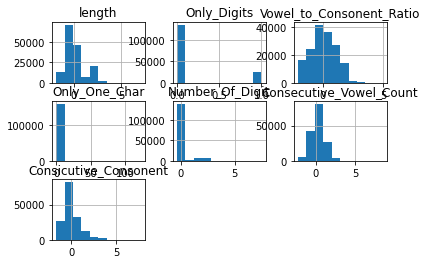

In [273]:
df2.hist()

In [274]:
df2.nunique()

length                       38
Only_Digits                   2
Vowel_to_Consonent_Ratio    190
Only_One_Char                25
Number_Of_Digit              29
Consecutive_Vowel_Count      10
Consicutive_Consonent        29
dtype: int64

In [275]:
df2.corr()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
length,1.000000,0.580862,-0.326244,-0.172321,0.693033,0.239140,0.518232
Only_Digits,0.580862,1.000000,-0.193860,-0.261866,0.827217,-0.072295,0.018670
Vowel_to_Consonent_Ratio,-0.326244,-0.193860,1.000000,0.027623,-0.172460,0.620168,-0.677033
Only_One_Char,-0.172321,-0.261866,0.027623,1.000000,-0.216620,-0.012782,-0.007986
Number_Of_Digit,0.693033,0.827217,-0.172460,-0.216620,1.000000,-0.026262,0.034145
Consecutive_Vowel_Count,0.239140,-0.072295,0.620168,-0.012782,-0.026262,1.000000,-0.185048
Consicutive_Consonent,0.518232,0.018670,-0.677033,-0.007986,0.034145,-0.185048,1.000000


In [276]:
df2.corr().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
length,1.0,0.581,-0.326,-0.172,0.693,0.239,0.518
Only_Digits,0.581,1.0,-0.194,-0.262,0.827,-0.0723,0.0187
Vowel_to_Consonent_Ratio,-0.326,-0.194,1.0,0.0276,-0.172,0.62,-0.677
Only_One_Char,-0.172,-0.262,0.0276,1.0,-0.217,-0.0128,-0.00799
Number_Of_Digit,0.693,0.827,-0.172,-0.217,1.0,-0.0263,0.0341
Consecutive_Vowel_Count,0.239,-0.0723,0.62,-0.0128,-0.0263,1.0,-0.185
Consicutive_Consonent,0.518,0.0187,-0.677,-0.00799,0.0341,-0.185,1.0


In [277]:
X = df2
y = df.isDGA

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Catboost

In [287]:
model = CatBoostClassifier(task_type='GPU',iterations=1000,random_state = 2021,eval_metric="Logloss")

In [288]:
model.fit(X_train,y_train,plot=True,eval_set=(X_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.047142
0:	learn: 0.6253191	test: 0.6255147	best: 0.6255147 (0)	total: 10.8ms	remaining: 10.8s
1:	learn: 0.5723669	test: 0.5727615	best: 0.5727615 (1)	total: 20.6ms	remaining: 10.3s
2:	learn: 0.5321262	test: 0.5325848	best: 0.5325848 (2)	total: 30.4ms	remaining: 10.1s
3:	learn: 0.4974619	test: 0.4980339	best: 0.4980339 (3)	total: 40.3ms	remaining: 10s
4:	learn: 0.4690590	test: 0.4696973	best: 0.4696973 (4)	total: 50.3ms	remaining: 10s
5:	learn: 0.4383632	test: 0.4390187	best: 0.4390187 (5)	total: 60.2ms	remaining: 9.98s
6:	learn: 0.4170601	test: 0.4177311	best: 0.4177311 (6)	total: 70.4ms	remaining: 9.99s
7:	learn: 0.3932693	test: 0.3938931	best: 0.3938931 (7)	total: 80.5ms	remaining: 9.98s
8:	learn: 0.3781355	test: 0.3787532	best: 0.3787532 (8)	total: 91.4ms	remaining: 10.1s
9:	learn: 0.3654236	test: 0.3660725	best: 0.3660725 (9)	total: 101ms	remaining: 10s
10:	learn: 0.3541701	test: 0.3547591	best: 0.3547591 (10)	total: 112ms	remaining: 10s
11:	learn: 0.3440785	

In [289]:
y_pred = model.predict(X_test)

In [290]:
f1_score(y_test,y_pred)

0.9035095434954703

In [291]:
accuracy_score(y_test,y_pred)

0.89715625

In [292]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     15877
           1       0.86      0.96      0.90     16123

    accuracy                           0.90     32000
   macro avg       0.90      0.90      0.90     32000
weighted avg       0.90      0.90      0.90     32000



In [293]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', conf_matrix)

Confusion matrix
 [[13301  2576]
 [  715 15408]]


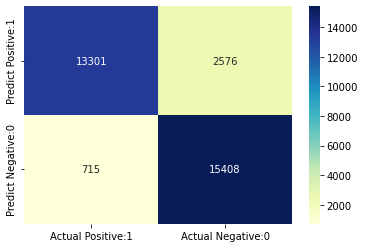

In [294]:
Cm = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(Cm, annot=True, fmt='d', cmap='YlGnBu')

In [297]:
joblib.dump(model,"Catboost.joblib")

['Catboost.joblib']

In [296]:
j = joblib.load("Catboost.joblib")